In [1]:
from pvodataset import PVODataset, UDFClass, QCfunc
import pandas as pd

In [2]:
# load PV output Dataset
pvod = PVODataset(path="../datasets/")

Welcome to PVODataset (PVOD).


In [3]:
# show basic information of PV output Dataset
pvod.info()

PVOD provides 1 metadata file and 10 PV station data files. The header of station files is : 'date_time', 'nwp_globalirrad', 'nwp_dirrectirrad', 'nwp_temperature', 'nwp_humidity', 'nwp_windspeed', 'nwp_winddirection', 'nwp_pressure','lmd_totalirrad', 'lmd_diffuseirrad', 'lmd_temperature', 'lmd_pressure','lmd_winddirection', 'lmd_windspeed', 'power'.              
-->Records of Station_0 are 28896.
-->Records of Station_1 are 33408.
-->Records of Station_2 are 30432.
-->Records of Station_3 are 14688.
-->Records of Station_4 are 33408.
-->Records of Station_5 are 9696.
-->Records of Station_6 are 31104.
-->Records of Station_7 are 32928.
-->Records of Station_8 are 33120.
-->Records of Station_9 are 24288.
-> Total 271968 records.


In [4]:
# show all files
files = pvod.show_files()
files

['metadata.csv',
 'station00.csv',
 'station01.csv',
 'station02.csv',
 'station03.csv',
 'station04.csv',
 'station05.csv',
 'station06.csv',
 'station07.csv',
 'station08.csv',
 'station09.csv']

In [5]:
# load metadata
metadata = pvod.read_metadata()
metadata

,Station_ID,Capacity,PV_Technology,Panel_Size,Panel_Number,Array_Tilt,Longitude,Latitude
0,station00,6600,Poly-Si,1.62360,26000,South 33°,114.951390,38.047780
1,station01,20000,Poly-Si,1.66350,74000,South 33°,117.457220,38.183060
2,station02,17000,Mono-Si,1.63680,64064,South 29°,114.198870,38.057280
3,station03,20000,Poly-Si,1.62000,75460,South 33°,114.114940,38.109560
4,station04,20000,Poly-Si,1.63680,75680,South 37°,114.867670,39.515500
5,station05,35000,Poly-Si,1.63515,114972,South 33°,114.123600,38.235500
6,station06,15000,Poly-Si,1.63350,56608,South 34°,114.548410,36.898910
7,station07,20000,Poly-Si,1.63350,80000,South 31°,113.641870,36.644030
8,station08,20000,Poly-Si,1.63350,78042,South 33°,113.899990,36.707610
9,station09,20000,Poly-Si,1.61370,84480,South 31°,115.059855,38.731417


In [6]:
# load selected station original data
# pd.set_option('display.max_columns', 5)

ori_data = pvod.read_ori_data(station_id=3)
ori_data

,date_time,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
0,2019-01-12 00:00:00,0.0,0.0,-0.07,44.66,1.50,234.97,989.14,0,0.0,-2.800000,988.500000,48,1.0,0.0
1,2019-01-12 00:15:00,0.0,0.0,-0.13,45.23,1.59,238.49,989.14,0,0.0,-2.800000,988.500000,138,1.0,0.0
2,2019-01-12 00:30:00,0.0,0.0,-0.15,45.60,1.67,246.38,989.25,0,0.0,-2.800000,988.500000,40,1.0,0.0
3,2019-01-12 00:45:00,0.0,0.0,-0.17,45.86,1.77,255.51,989.31,0,0.0,-3.900000,988.500000,130,1.0,0.0
4,2019-01-12 01:00:00,0.0,0.0,-0.21,46.08,1.88,262.02,989.08,0,0.0,-3.900000,988.500000,158,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14683,2019-06-13 22:45:00,0.0,0.0,24.45,61.99,4.00,327.25,974.82,0,0.0,21.799999,972.799988,72,0.8,0.0
14684,2019-06-13 23:00:00,0.0,0.0,24.24,62.48,4.08,331.59,974.96,0,0.0,20.700001,972.799988,350,0.7,0.0
14685,2019-06-13 23:15:00,0.0,0.0,24.08,62.74,4.02,334.14,975.13,0,0.0,20.700001,972.799988,71,1.0,0.0
14686,2019-06-13 23:30:00,0.0,0.0,23.95,62.97,3.94,334.80,975.28,0,0.0,20.700001,972.799988,104,0.0,0.0


In [7]:
# select feature (Power) slice 
ori_data["power"][128:256]

128    0.440455
129    1.307158
130    2.358568
131    3.452602
132    4.504012
         ...   
251    3.537852
252    4.916051
253    3.253687
254    4.305097
255    2.244902
Name: power, Length: 128, dtype: float64

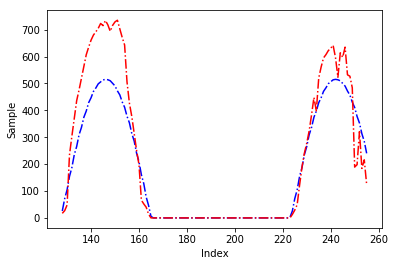

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ori_data["nwp_globalirrad"][128:256], 'b-.')
plt.plot(ori_data["lmd_totalirrad"][128:256],  'r-.')

plt.ylabel('Sample')
plt.xlabel('Index')

plt.show()

In [9]:
ori_data.keys()

Index(['date_time', 'nwp_globalirrad', 'nwp_directirrad', 'nwp_temperature',
       'nwp_humidity', 'nwp_windspeed', 'nwp_winddirection', 'nwp_pressure',
       'lmd_totalirrad', 'lmd_diffuseirrad', 'lmd_temperature', 'lmd_pressure',
       'lmd_winddirection', 'lmd_windspeed', 'power'],
      dtype='object')

In [10]:
station01_info = pvod.station_info(station_id=5)
station01_info

,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
count,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000
mean,236.183484,210.278758,17.576996,33.857412,4.229796,200.783447,990.266742,232.338490,104.553733,17.914068,988.217985,175.022380,1.695854,7.055607
std,301.375854,280.036566,8.419162,19.594040,2.333221,94.170052,7.315803,320.622654,135.135731,7.603053,7.049093,115.051643,1.502231,9.750248
min,0.000000,0.000000,0.490000,5.110000,0.170000,0.050000,971.200000,0.000000,0.000000,-0.300000,970.500000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.910000,19.987500,2.540000,122.485000,984.317500,0.000000,0.000000,12.000000,982.799988,59.000000,0.600000,0.000000
50%,38.885000,11.765000,17.180000,28.620000,3.790000,233.440000,990.050000,26.000000,28.000000,18.000000,987.700012,157.000000,1.400000,0.697046
75%,467.527500,412.795000,23.452500,42.860000,5.410000,279.170000,995.650000,436.250000,191.000000,23.299999,993.700012,292.000000,2.500000,13.394230
max,940.360000,884.030000,39.980000,98.380000,14.350000,359.970000,1009.530000,1156.000000,762.000000,39.099998,1007.400024,359.000000,16.000000,35.118130


In [11]:
# select data within date range 
pd.set_option('display.max_columns', 4)

t1 = pd.to_datetime('2019/3/05 08:00')
t2 = pd.to_datetime('2019/5/20 17:00')
slice_data = pvod.select_daterange(station_id=5, start_date=t1, end_date=t2)
slice_data

,date_time,nwp_globalirrad,...,lmd_windspeed,power
32,2019-03-05 08:00:00,160.15,...,0.7,0.00000
33,2019-03-05 08:15:00,217.53,...,0.7,0.00000
34,2019-03-05 08:30:00,255.72,...,1.5,0.00000
35,2019-03-05 08:45:00,312.05,...,0.4,0.00000
36,2019-03-05 09:00:00,348.63,...,0.7,0.00000
...,...,...,...,...,...
7360,2019-05-20 16:00:00,602.98,...,3.3,18.14094
7361,2019-05-20 16:15:00,551.86,...,3.9,16.38525
7362,2019-05-20 16:30:00,516.56,...,1.4,14.43706
7363,2019-05-20 16:45:00,462.04,...,4.1,12.47291


In [12]:
# data intersection between 2 PV stations
start, end = pvod.date_intersection(station_id_a=3, station_id_b=9)
start, end

Station_3   : start: 2019-01-12 00:00:00, end: 2019-06-13 23:45:00
Station_9   : start: 2018-09-26 00:00:00, end: 2019-06-13 23:45:00
intersection: start: 2019-01-12 00:00:00, end: 2019-06-13 23:45:00


(Timestamp('2019-01-12 00:00:00'), Timestamp('2019-06-13 23:45:00'))

In [13]:
# User-Defined Functions for metadata (Demo)
area = pvod.UDF(station_id=1, param0='Panel_Size', param1='Panel_Number')
area

123099.0

In [14]:
ori_data = pvod.read_ori_data(station_id=3)
ori_data
train_data, test_data = pvod.split_data(xy=ori_data, mode="end_order", ratio=0.8)
print(f"train :\n {train_data} \n=========================\
        test:\n {test_data}, \n\=========================\
        len_train: {len(train_data)}, len_test: {len(test_data)}")

train :
                 date_time  nwp_globalirrad  ...  lmd_windspeed     power
0     2019-01-12 00:00:00             0.00  ...            1.0  0.000000
1     2019-01-12 00:15:00             0.00  ...            1.0  0.000000
2     2019-01-12 00:30:00             0.00  ...            1.0  0.000000
3     2019-01-12 00:45:00             0.00  ...            1.0  0.000000
4     2019-01-12 01:00:00             0.00  ...            1.0  0.000000
...                   ...              ...  ...            ...       ...
11745 2019-05-14 08:15:00           498.38  ...            0.7  6.919413
11746 2019-05-14 08:30:00           532.70  ...            0.7  7.686658
11747 2019-05-14 08:45:00           581.54  ...            0.9  7.303036
11748 2019-05-14 09:00:00           609.95  ...            0.3  7.786116
11749 2019-05-14 09:15:00           647.76  ...            1.7  5.740129

[11750 rows x 15 columns] 
=========================        test:
                 date_time  nwp_globalirrad  ...

In [15]:
users_func = UDFClass()
users_func.calcuate(station_id=1, param0='Panel_Size', param1='Panel_Number')
users_func.get_id_metedata(1)

Welcome to PVODataset (PVOD).
area = 123099.0 m^2.


Station_ID       station01
Capacity             20000
PV_Technology      Poly-Si
Panel_Size          1.6635
Panel_Number         74000
Array_Tilt       South 33°
Longitude          117.457
Latitude           38.1831
Name: 1, dtype: object

In [16]:
ori_data.keys()

Index(['date_time', 'nwp_globalirrad', 'nwp_directirrad', 'nwp_temperature',
       'nwp_humidity', 'nwp_windspeed', 'nwp_winddirection', 'nwp_pressure',
       'lmd_totalirrad', 'lmd_diffuseirrad', 'lmd_temperature', 'lmd_pressure',
       'lmd_winddirection', 'lmd_windspeed', 'power'],
      dtype='object')

In [17]:
# quality control functions
qc = QCfunc()
print(qc.phy(mode='GHI', x=ori_data['lmd_totalirrad'][0], E_0n=ori_data['lmd_diffuseirrad'][0], Z=33))


True


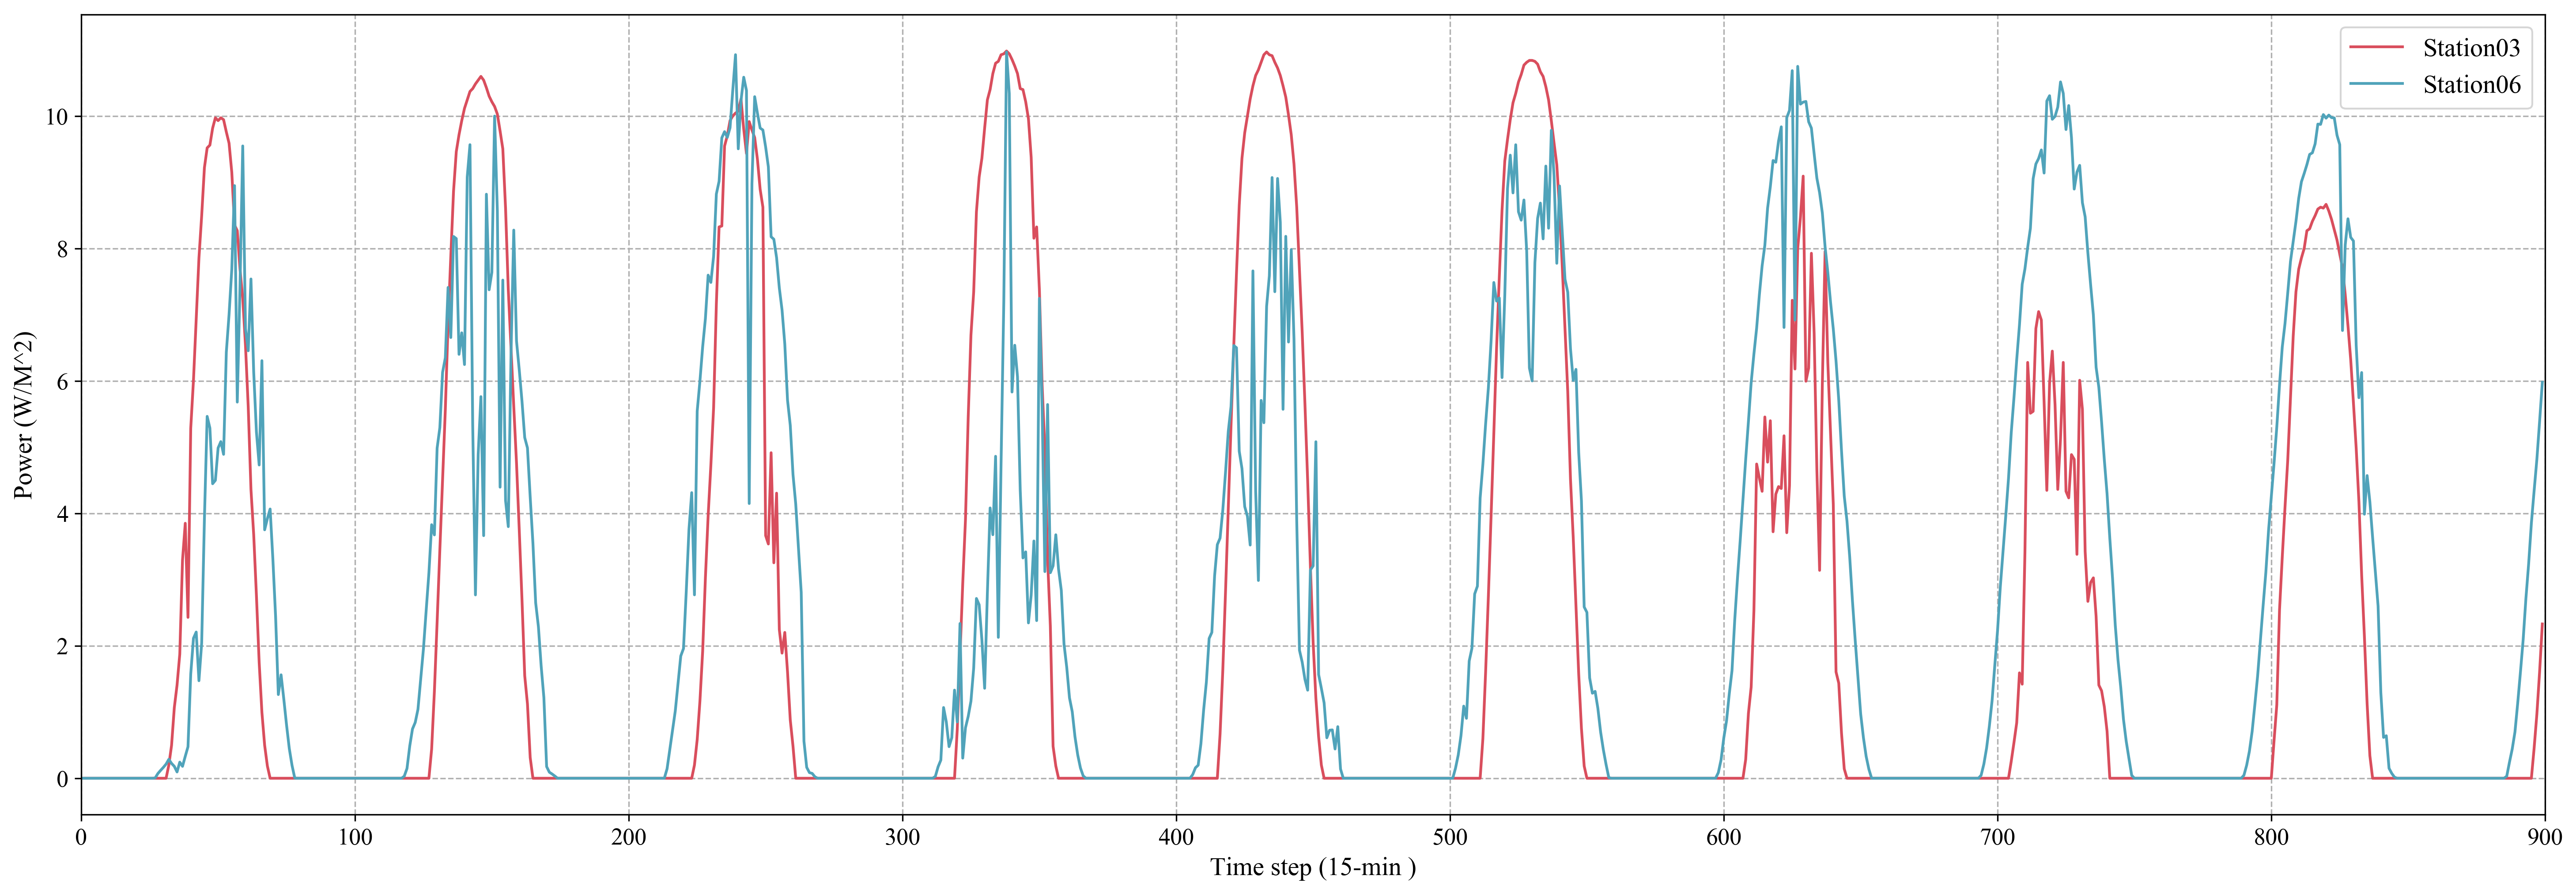

In [18]:
ori_data0 = pvod.read_ori_data(3)
ori_data2 = pvod.read_ori_data(6)

import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(24,8),dpi=300)

fs = 14

start, end = 0, 900

line0, = plt.plot(ori_data0["power"][start:end], color='#D94E5D', linestyle='-')
line1, = plt.plot(ori_data2["power"][start:end], color='#50A3BA', linestyle='-')

plt.legend(handles=[line0, line1], labels=['Station03','Station06'], loc='best',fontsize=fs)

plt.grid(ls='--')
plt.xlim(0,end)
plt.yticks(size = fs-1)
plt.xticks(size = fs-1)
plt.ylabel('Power (W/M^2)',fontsize=fs)
plt.xlabel('Time step (15-min )',fontsize=fs)
plt.savefig('./powersample.png',bbox_inches='tight')
plt.show()
